<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/PySpark_Training/pyspark_training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PySpark Training Notebook**

## Apache Spark Introduction

Spark is currently one of the most popular tools for big data analytics. Hadoop (another big data analytics tool) is a slightly older technology, although still in use by some companies. Spark is generally faster than Hadoop, which is why Spark has become more popular over the last few years.

There are many other big data tools and systems, each with its own use case. For example, there are database system like Apache Cassandra and SQL query engines like Presto. But Spark is still one of the most popular tools for analyzing large data sets.

**Why Spark?**

Spark is meant for big data sets that cannot fit on one computer. But you don't need Spark if you are working on smaller data sets. In the cases of data sets that can fit on your local computer, there are many other options out there you can use to manipulate data. For example:

* AWK: command line tool for manipulating text files.
* R: programming language and software environment for statistical computing.
* Python data libraries, which include Pandas, Matplotlib, NumPy, and scikit-learn among other libraries.

**Spark's limitations**

Spark Streaming’s latency is at least 500 milliseconds since it operates on micro-batches of records, instead of processing one record at a time. Native streaming tools such as Storm, Apex, or Flink can push down this latency value and might be more suitable for low-latency applications. Flink and Apex can be used for batch computation as well, so if you're already using them for stream processing, there's no need to add Spark to your stack of technologies.

Another limitation of Spark is its selection of machine learning algorithms. Currently, Spark only supports algorithms that scale linearly with the input data size. In general, deep learning is not available either, though there are many projects that integrate Spark with Tensorflow and other deep learning tools.

**The Spark Cluster**

When we talk about distributed computing, we generally refer to a big computational job executing across a cluster of nodes. Each node is responsible for a set of operations on a subset of the data. At the end, we combine these partial results to get the final answer. There are four different modes to setup Spark:

* Local mode: In this case, everything happens on a single machine. So, while we use spark's APIs, we don't really do any distributed computing. The local mode can be useful to learn syntax and to prototype your project.

The other three modes are distributed and declare a cluster manager. The cluster manager is a separate process that monitors available resources and makes sure that all machines are responsive during the job. There are three different options of cluster managers:

* Spark's own Standalone Customer Manager. In Spark's Standalone mode there is a Driver Process. If you open a Spark shell, either Python or Scala, you are directly interacting with the driver program. It acts as the master and is responsible for scheduling tasks
* YARN from the Hadoop project.
* Another open-source manager from UC Berkeley's AMPLab Coordinators.



## PySpark

**What is PySpark?**

PySpark is the Python API for Apache Spark, an open source, distributed computing framework and set of libraries for real-time, large-scale data processing. If you’re already familiar with Python and libraries such as Pandas, then PySpark is a good language to learn to create more scalable analyses and pipelines. PySpark gives you access to all the important Spark data constructs like:

* RDDs.
* DataFrames.
* Spark SQL.

That means you can write Spark code that runs in either a Spark Cluster, in a Jupyter Notebook, or on your laptop. When you write code on your Jupyter Notebook or a laptop, Spark creates a temporary Spark node that runs locally. Because Spark uses Java, it is necessary to install the JDK (Java Development Kit) on a computer used to run PySpark code.

**PySpark DataFrames**

The key data type used in PySpark is the Spark dataframe. This object can be thought of as a table distributed across a cluster, and has functionality that is similar to dataframes in R and Pandas. If you want to do distributed computation using PySpark, then you’ll need to perform operations on Spark dataframes and not other Python data types.

### 0. Instalation

In [1]:
# Comment the whole cell line once pyspark has been instalated in your environment
# !pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=c961c8582c6a5e8769739356f3f460f68f3ecbfb798f1eafc98dd98893df6153
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


### 1. Introduction to distributed data

The first component of each Spark Program is the *SparkContext*. The *SparkContext* is the main entry point for Spark functionality and connects the cluster with the application.

To create a *SparkContext*, we first need a *SparkConf* object to specify some information about the application such as its name and the master's nodes' IP address. If we run Spark in local mode, we can just put the string local as master.

To read data frames, we need to use Spark SQL equivalent, the *SparkSession*.
Similarity to the *SparkConf*, we can specify some parameters to create a *SparkSession*.

*getOrCreate()* for example, means that if you already have a *SparkSession* running, instead of creating a new one, the old one will be returned and its parameters will be modified to the new configurations.

In [2]:
from pyspark.sql import SparkSession

# Because we aren't running on a spark cluster, the session is just for development
spark = SparkSession \
    .builder \
    .appName("PySpark Training") \
    .getOrCreate()

* **Resilient Distributed Dataset (RDD)**

A Resilient Distributed Dataset (RDD) is a low-level API and Spark's underlying data abstraction. An RDD is a static set of items distributed across clusters to allow parallel processing. The data structure stores any Python, Java, Scala, or user-created object. An RDD stores data in read-only mode, making it immutable. Performing operations on existing RDDs creates new objects without manipulating existing data.

RDDs reside in RAM through a caching process. Data that does not fit is either recalculated to reduce the size or stored on a permanent storage. Caching allows retrieving data without reading from disk, reducing disk overhead. RDDs further distribute the data storage across multiple partitions. Partitioning allows data recovery in case a node fails and ensures the data is available at all times.

The main features of a Spark RDD are:

* **In-memory computation**: data calculation resides in memory for faster access and fewer I/O operations.
* **Fault tolerance**: the tracking of data creation helps recover or recreate lost data after a node failure.
* **Immutability**: RDDs are read-only. The existing data cannot change, and transformations on existing data generate new RDDs.
* **Lazy evaluation**: data does not load immediately after definition, the data loads when applying an action to the data.

For example, let's create a Python List with some football players from the Italian national team.

In [3]:
# FIFA players list
fifa_players = [
        "Gianluigi Buffon",
        "Andrea Barzagli",
        "Giorgio Chiellini",
        "Leonardo Bonucci",
        "Claudio Marchisio",
        "Marco Verratti",
        "Lorenzo Insigne",
        "Andrea Immobile"
]

After some initialization, we'll convert the FIFA players list (just a normal Python list) to a distributed dataset that Spark can use (RDD). This uses a special *spark.sparkContext* object. The Spark Context has a method *parallelize* that takes a Python object and distributes the object across the machines in your cluster so Spark can process the dataset.

In [4]:
distributed_fifa_players = spark.sparkContext.parallelize(fifa_players)

Once this small dataset is accessible to Spark, we want to do something with it. One example is simply converting the song title to a uppercase, a common pre-processing step to standardize your data.

In [5]:
distributed_fifa_players.map(lambda player: player.upper())

PythonRDD[1] at RDD at PythonRDD.scala:53

All of these steps will appear to run instantly but remember, the spark commands are using lazy evaluation, they haven't really converted the players to uppercase yet. Spark will procrastinate in transforming the songs to uppercase since you might have several other processing steps like removing punctuation, Spark wants to wait until the last minute to see if it can streamline its work, and combine these into a single stage.

If we want to force Spark to take some action on the data, we can use the *collect* function, which gathers the results from all of the machines in our cluster.

*collect* is an action operation that is used to retrieve all the elements of the dataset (from all nodes) to the driver node. We should use the *collect* on smaller dataset usually after *filter*, *group* e.t.c. Retrieving larger datasets results in *OutOfMemory* error.

In [6]:
distributed_fifa_players.map(lambda player: player.upper()).collect()

['GIANLUIGI BUFFON',
 'ANDREA BARZAGLI',
 'GIORGIO CHIELLINI',
 'LEONARDO BONUCCI',
 'CLAUDIO MARCHISIO',
 'MARCO VERRATTI',
 'LORENZO INSIGNE',
 'ANDREA IMMOBILE']

* **PySpark DataFrame**

As we have seen before, the key data type used in PySpark is the Spark dataframe. Spark dataframes are distributed collections of data that can be run on multiple machines and organize data into named columns.

In an attempt to dig deeper into the PySpark structure of DataFrame, we are going to create a table with several football players of the Italian national team.

|number|firstName| lastName|  position|
|:---|:-------------|:-----------|:------|
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|

In [7]:
italy_team = [[1, 'Gianluigi', 'Buffon', 'Goalkeeper'],
              [5, 'Andrea', 'Barzagli', 'Defender'],
              [8, 'Claudio', 'Marchisio', 'Midfielder'],
              [11, 'Marco', 'Verratti', 'Midfielder'],
              [9, 'Ciro', 'Immobile', 'Attackant']]

dframe = spark.createDataFrame(italy_team, ["number", "firstName", "lastName", "position"])
dframe.show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



Imagine we want to select just the columns 'number' and 'firstName'. We can use the *select* statement, but it is very important to notice that we just get a display table, not a copy. Because of this, there is no space reserved in memory for any new object, it is just a new reference to the same object. If we modify one of both references, the second one will be applied with the same change. The PySpark *select* behaves in the same way as the SQL *SELECT* statement.

In [8]:
dframe2 = dframe.select('number', 'firstName')
dframe2.show()

+------+---------+
|number|firstName|
+------+---------+
|     1|Gianluigi|
|     5|   Andrea|
|     8|  Claudio|
|    11|    Marco|
|     9|     Ciro|
+------+---------+



Now we are going to select the columns 'number' and 'lastName', and then join the both tables together with the *join* statement.

In [9]:
dframe3 = dframe.select('number', 'lastName')

dframe4 = dframe2.join(dframe3, on='number')
dframe4.show()

+------+---------+---------+
|number|firstName| lastName|
+------+---------+---------+
|     1|Gianluigi|   Buffon|
|     5|   Andrea| Barzagli|
|     8|  Claudio|Marchisio|
|     9|     Ciro| Immobile|
|    11|    Marco| Verratti|
+------+---------+---------+



In particular, the t-shirt number is unique, so we could consider the column 'number' as the PRIVATE KEY of both tables.

In [10]:
dframe4.where(dframe4.number == 1).show()
dframe4.filter(dframe4.number == 1).show()

+------+---------+--------+
|number|firstName|lastName|
+------+---------+--------+
|     1|Gianluigi|  Buffon|
+------+---------+--------+

+------+---------+--------+
|number|firstName|lastName|
+------+---------+--------+
|     1|Gianluigi|  Buffon|
+------+---------+--------+



Operations:

* Add rows.
* Add columns.
* Delete rows.
* Delete columns.
* Concat DataFrames.
* Change certain cells.

We are going to practice over the original DataFrame: dframe.

* *Add rows*: we want to add a new football player to the team, Roberto Baggio with number 10, as Atackant. If we wanted to add several rows, we would do it in the same way.

In [11]:
newRow = spark.createDataFrame([(10, 'Roberto', 'Baggio', 'Attackant')], ["number", "firstName", "lastName", "position"])
appended = dframe.union(newRow)
appended.show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
|    10|  Roberto|   Baggio| Attackant|
+------+---------+---------+----------+



* *Add columns:* we want to add a new column, the national team.

In [12]:
from pyspark.sql.functions import lit
appended2 = dframe.withColumn("nationalTeam", lit("Italy"))
appended2.show()

+------+---------+---------+----------+------------+
|number|firstName| lastName|  position|nationalTeam|
+------+---------+---------+----------+------------+
|     1|Gianluigi|   Buffon|Goalkeeper|       Italy|
|     5|   Andrea| Barzagli|  Defender|       Italy|
|     8|  Claudio|Marchisio|Midfielder|       Italy|
|    11|    Marco| Verratti|Midfielder|       Italy|
|     9|     Ciro| Immobile| Attackant|       Italy|
+------+---------+---------+----------+------------+



* *Delete rows:* Roberto Baggio is no longer an active player, so let´s remove his contanining row.

In [13]:
appended.filter(appended.number != '10').show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



* *Delete columns:* the national team is redundant, every row contains the value 'Italy'. Therefore let's drop the 'country' column.

In [14]:
appended2.drop(appended2.nationalTeam).show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



* **PySpark SQL DataFrame**

DataFrames allows PySpark to query data using another way, like a SQL table. Notice the fact that this time the *join* method returns a new DataFrame, it is not a display like we have seen before. We could have done the same with the submodule *pyspark.sql*.

In [15]:
dframe2.createOrReplaceTempView("fifa_table_1")
dframe3.createOrReplaceTempView("fifa_table_2")

spark.sql('''
          SELECT fifa_table_1.number, firstName, lastName
          FROM fifa_table_1 JOIN fifa_table_2
          ON fifa_table_1.number = fifa_table_2.number
          WHERE fifa_table_1.number == 1
          '''
          ).show()

+------+---------+--------+
|number|firstName|lastName|
+------+---------+--------+
|     1|Gianluigi|  Buffon|
+------+---------+--------+



### 2. Reading a DataFrame

To see a real dataset example, we are going one dataset. The fifa17_players.csv consists of the football players database, with personal information and skills rating, extracted from the videogame FIFA 17. First of all, we are going to download it from github repository.

|Name|Nationality|National_Position|National_Kit|Club|Club_Position|Club_Kit|Club_Joining|...|
|:---|:-------------|:-----------|:------|:------|:------|:------|:------|:------|
|            De Gea|      Spain|               GK|         1.0|Manchester Utd|           GK|     1.0|  07/01/2011| ... |
|      Lionel Messi|  Argentina|               RW|        10.0|  FC Barcelona|           RW|    10.0|  07/01/2004| ... |
|            Neymar|     Brazil|               LW|        10.0|  FC Barcelona|           LW|    11.0|  07/01/2013| ... |
|       Luis Suárez|    Uruguay|               LS|         9.0|  FC Barcelona|           ST|     9.0|  07/11/2014| ... |
|      Manuel Neuer|    Germany|               GK|         1.0|     FC Bayern|           GK|     1.0|  07/01/2011| ... |
|  ...| ...| ...| ...| ...|           ...|     ...|  ... | ... |

In [16]:
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/PySpark_Training/fifa17_players.csv

--2023-08-29 05:19:20--  https://raw.githubusercontent.com/josefernandezest98/training/main/PySpark_Training/fifa17_players.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3930217 (3.7M) [text/plain]
Saving to: ‘fifa17_players.csv’

fifa17_players.csv  100%[===================>]   3.75M  --.-KB/s    in 0.03s   

2023-08-29 05:19:20 (132 MB/s) - ‘fifa17_players.csv’ saved [3930217/3930217]



In [17]:
fifa_df = spark.read.csv("fifa17_players.csv", inferSchema = True, header = True)
fifa_df.show(10)

+------------------+-----------+-----------------+------------+--------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|              Name|Nationality|National_Position|National_Kit|          Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_

### 3. Exploratory Data Analysis

In [18]:
import pandas as pd

fifa_df.printSchema()
pd.DataFrame(fifa_df.dtypes, columns = ['Column Name','Data type'])
fifa_df.describe().toPandas()

root
 |-- Name: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- National_Position: string (nullable = true)
 |-- National_Kit: double (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club_Position: string (nullable = true)
 |-- Club_Kit: double (nullable = true)
 |-- Club_Joining: string (nullable = true)
 |-- Contract_Expiry: double (nullable = true)
 |-- Rating: integer (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Preffered_Foot: string (nullable = true)
 |-- Birth_Date: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Preffered_Position: string (nullable = true)
 |-- Work_Rate: string (nullable = true)
 |-- Weak_foot: integer (nullable = true)
 |-- Skill_Moves: integer (nullable = true)
 |-- Ball_Control: integer (nullable = true)
 |-- Dribbling: integer (nullable = true)
 |-- Marking: integer (nullable = true)
 |-- Sliding_Tackle: integer (nullable = true)
 |-- Standing_Tackle:

,summary,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,count,17588,17588,1075,1075,17588,17587,17587,17587,17587,...,17588,17588,17588,17588,17588,17588,17588,17588,17588,17588
1,mean,None,None,None,12.21953488372093,None,None,21.294535736623644,None,2018.8994143401376,...,47.40317261769388,47.18114623607005,43.38344325676598,49.16573800318399,43.27558562656357,16.6096201955879,16.82306117807596,16.458323857175348,16.559813509210827,16.901182624516714
2,stddev,None,None,None,6.933186712887216,None,None,19.163740902120328,None,1.6987874397242104,...,19.211887239466655,18.46439603587325,17.701902992977164,15.871735042516146,17.71083867546305,17.13990350837133,17.79805177156695,16.600741103484737,16.967255592321123,18.034484658944706
3,min,A.J. DeLaGarza,Afghanistan,CAM,1.0,1. FC Heidenheim,CAM,1.0,01/01/1993,2017.0,...,4,6,4,7,3,1,1,1,1,1
4,max,Željko Filipović,Zimbabwe,Sub,36.0,Śląsk Wrocław,Sub,99.0,12/31/2016,2023.0,...,91,92,93,96,93,91,89,95,91,90


Now, we are going to look for the top rating teams, the clubs with the highest players level based on the average rating.

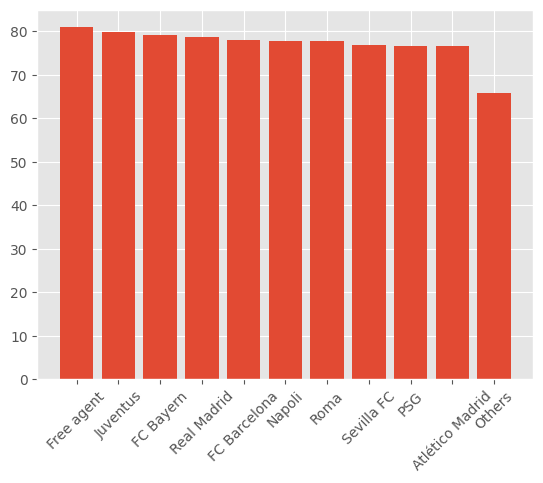

In [32]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
plt.style.use('ggplot')

top_avg_teams = fifa_df.groupBy('Club').avg("Rating").sort(col("avg(Rating)").desc()).toPandas()
others = [top_avg_teams['avg(Rating)'][10:].mean()]

plt.bar(top_avg_teams['Club'][:10].tolist()+['Others'],top_avg_teams['avg(Rating)'][:10].tolist()+others)
plt.xticks(rotation = 45)
plt.show()

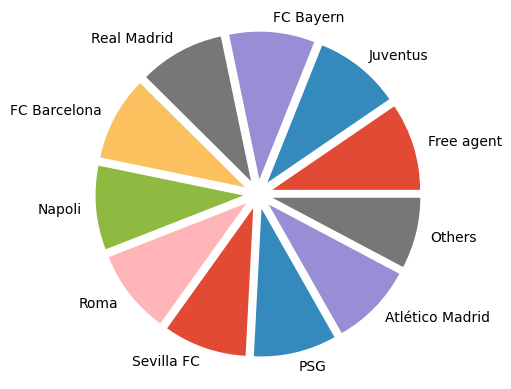

In [42]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(x=top_avg_teams['avg(Rating)'][:10].tolist()+others,
        labels=top_avg_teams['Club'][:10].tolist()+['Others'],
        explode=explode)
plt.show()

In [46]:
fc_barcelona = fifa_df.where(fifa_df.Club == 'FC Barcelona')
fc_barcelona.show(5)

+------------+-----------+-----------------+------------+------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|        Name|Nationality|National_Position|National_Kit|        Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleratio

<Axes: xlabel='Rating'>

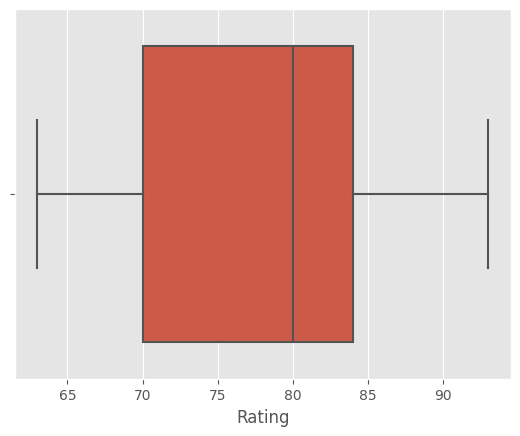

In [51]:
import seaborn as sns

fc_barcelona_df = fc_barcelona.toPandas()
sns.boxplot(x=fc_barcelona_df['Rating'])

<Axes: xlabel='Rating', ylabel='Club_Position'>

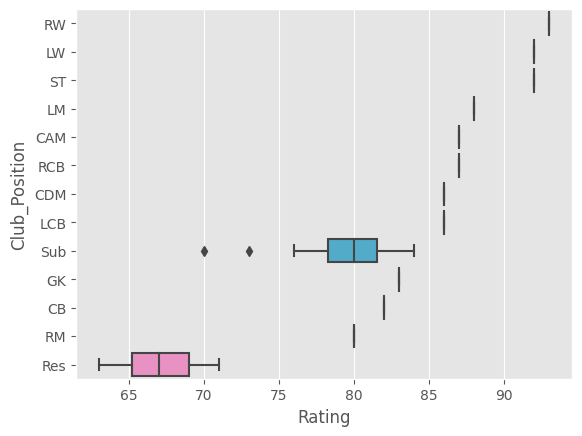

In [50]:
sns.boxplot(x=fc_barcelona_df['Rating'],y=fc_barcelona_df['Club_Position'])

<Axes: ylabel='Frequency'>

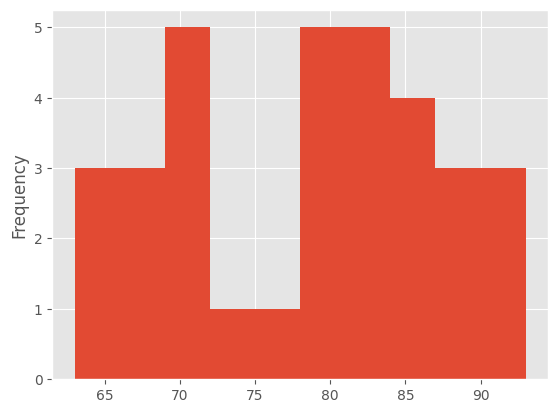

In [55]:
fc_barcelona_df['Rating'].plot.hist()

<Axes: ylabel='Density'>

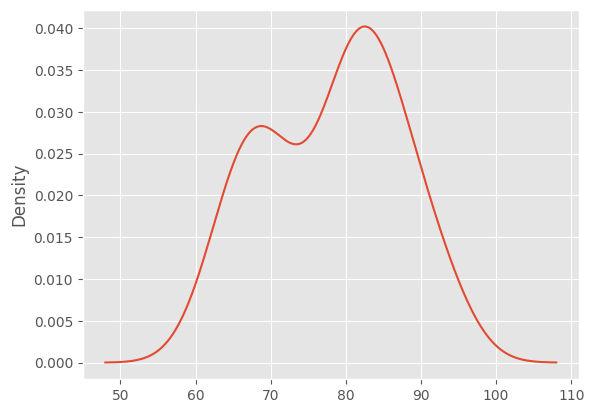

In [56]:
fc_barcelona_df['Rating'].plot.density()

### 4. Machine Learning

For Machine Learning, we are going to use MLlib, which is Spark’s library. Its goal is to make practical machine learning scalable and easy. At a high level, it provides tools such as:

* ML Algorithms: common learning algorithms such as classification, regression, clustering, and collaborative filtering
* Featurization: feature extraction, transformation, dimensionality reduction, and selection
* Pipelines: tools for constructing, evaluating, and tuning ML Pipelines
* Persistence: saving and load algorithms, models, and Pipelines
* Utilities: linear algebra, statistics, data handling, etc.

### **Exercise 1**
Imagine you are a Data Scientist for FC Barcelona. PSG has made an offert for the football player Neymar, and he has already accepted. The team manager is asking for your support trying to supply the vacant, and find the player that fits better to Neymar's position. You work consist of filtering the database, and generating a Machine Learning model to predict the best option. For that you must follow the next steps:
* Find which role plays in FC Barcelona the player Neymar.
* Select the available players in other teams. As FC Barcelona has a large budget, you are able to sign any player in the database. We recommend you to have several options, for just in case there is no agreement with the first player you consider to contract.
* FC Barcelona is quite prestigious, every player in your list should be rated over 75.
* Now it is time to compare football players. The best option is the one more similar to Neymar. For that, cluster football players and take the final list nearest to Neymar habilities and ratings. Notice that the are several clustering techniques, try to find the best one between them, and the appropiate number of clusters.
* Visualize the players map in two dimensions, applying Principal Component Analysis. The clustering technique can be done in two or more dimensions, although consider there might be considerable differences between the explained variance.



1. Find wich role plays in FC Barcelona the football player Neymar, selecting the column 'Club_Position' where the necessary conditions.

In [ ]:
fifa_df.select('Club_Position').where((fifa_df.Club == "FC Barcelona") & (fifa_df.Name == "Neymar")).show()

+-------------+
|Club_Position|
+-------------+
|           LW|
+-------------+



Once we know Neymar plays in 'LW' position (Left Wing), our aim will consist of looking for the football player wich better fits in the team.

2. Create a table with *select* statement (not really creation, just display) with the available players to be chosen.

In [ ]:
available_players = fifa_df.where((fifa_df.Club_Position == "LW") & (fifa_df.Name != "Neymar"))
available_players.show(5)

+-----------------+-----------+-----------------+------------+---------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|             Name|Nationality|National_Position|National_Kit|           Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_

3. Filter the database with column 'Rating' over 75.

In [ ]:
available_players_filtered = available_players.where(available_players.Rating >= 75)
available_players_filtered.show(5)

+-----------------+-----------+-----------------+------------+---------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|             Name|Nationality|National_Position|National_Kit|           Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_

4. Between the new available players after applying the filter, we must choose the perfect one.

* Principal Component Analysis for visualizing the skills in just two dimensions. The chosen skills will be: 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'. Notice that we can also select the 'Name' column as label.

In [ ]:
col_names = ['Name', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
                                         'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
                                         'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions',
                                         'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
                                         'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
                                         'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
                                         'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']

PCA_dataset = available_players_filtered.select(*col_names)
PCA_dataset.show(5)

+-----------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+
|             Name|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleration|Speed|Stamina|Strength|Balance|Agility|Jumping|Heading|Shot_Power|Finishing|Long_Shots|Curve|Freekick_Accuracy|Penalties|Volleys|
+-----------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+--

Notice the variable 'Work_Rate' is categorical, and not numerical. First of all, we must convert to int categories. The simplest transformation could be the next one:

* High / Low      ---> 1

* High / Medium   ---> 2

* Medium / Medium ---> 3

* High / High     ---> 4

* High / Low      ---> 5

* ...

Although this transformation does not keep the order, the best one should be High / Low ---> (3, 1) and totally ordered, then splitted into two columns, that is enough for what we want to see.

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Work_Rate", outputCol="Work_Rate_numerical")
indexed = indexer.fit(PCA_dataset).transform(PCA_dataset)
indexed = indexed.drop('Work_Rate')
indexed.show(5)

+-----------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+-------------------+
|             Name|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleration|Speed|Stamina|Strength|Balance|Agility|Jumping|Heading|Shot_Power|Finishing|Long_Shots|Curve|Freekick_Accuracy|Penalties|Volleys|Work_Rate_numerical|
+-----------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+--

Now we can normalize and standarize the data in order to attempt the PCA.

In [ ]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col
column = col_names[2]
indexed_type = indexed.withColumn(column,col(column).cast(FloatType()))

normalizer = Normalizer(inputCol=column, outputCol='scales_'+column, p=1.0)
l1NormData = normalizer.transform(indexed_type)

# Normalize each Vector using $L^\infty$ norm.
lInfNormData = normalizer.transform(indexed, {normalizer.p: float("inf")})

NameError: ignored

In [ ]:
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import StandardScaler

column = col_names[2]

normalizer = Normalizer(inputCol=column, outputCol='scales_'+column, p=1.0)
l1NormData = normalizer.transform(indexed)

# Normalize each Vector using $L^\infty$ norm.
lInfNormData = normalizer.transform(indexed, {normalizer.p: float("inf")})
lInfNormData


IllegalArgumentException: ignored

In [ ]:
from pyspark.ml.feature import StandardScaler

for column in col_names:

  standardScaler = StandardScaler()
  standardScaler.setInputCol(column)
  standardScaler.setOutputCol(column + "_scaled")
  model = standardScaler.fit(indexed)

  standardScaler.setInputCol(column)

model = standardScaler.fit(indexed)
model.getInputCol()

TypeError: ignored

**Exercise 2**

Hiring first candidates in you player list has finally been impossible. Consequently, the first team manager Luis Enrique Martínez is angry with the FC Barcelona directive and has decided to leave the club. Among other offerts, the most interesting for Luis Enrique is FC Bayern Munich, that is really interested in hiring a new manager.  

As a data scientist, you must contribute essential information about the FC Bayern to conclude wether Luis Enrique should go there or not. After several reports, we know that the club fits perfectly with ball possesion and its way to play. FC Bayern is a quite known team, so the player´s level is appropiate for Luis Enrique. Finally, what we want to know is the rating balance.

We assume the average rating is similar to FC Barcelona, but it is necessary to analyze if the balance and rechanges have the quality for such a long football term, in which Bayern opts to win its national league and coupe, and the Champions trophee. The way we are going to do it is comparing the rating density/distribution of both football teams.

In [58]:
fc_bayern = fifa_df.where(fifa_df.Club == 'FC Bayern')
fc_bayern.show(5)
fc_bayern_df = fc_bayern.toPandas()

+------------------+-----------+-----------------+------------+---------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|              Name|Nationality|National_Position|National_Kit|     Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Accel

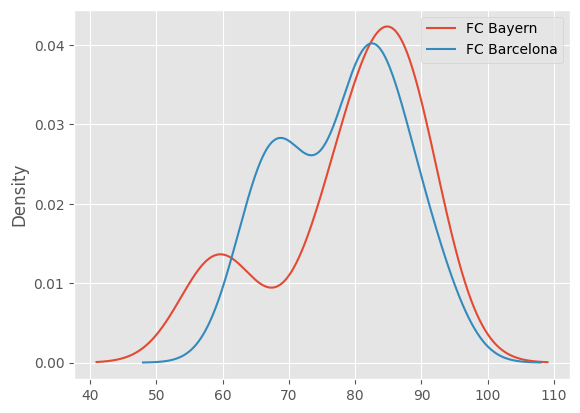

In [83]:
fc_bayern_df['Rating'].plot.density(label='FC Bayern')
fc_barcelona_df['Rating'].plot.density(label='FC Barcelona')
plt.legend()

In [87]:
print('FC Bayern median rating: ' ,fc_bayern_df['Rating'].median())
print('FC Barcelona median rating: ' ,fc_barcelona_df['Rating'].median())

FC Bayern median rating:  83.0
FC Barcelona median rating:  80.0


We can see both medians are similar, a little better the FC Bayern Munich, but it seems that the second mode is much lower in the FC Bayen case. For that, we are going to perform the Kolmogorov-Smirnov contrast test. It measures the distance between both accumulated distributions, and gives as a result wether they are similar or not.

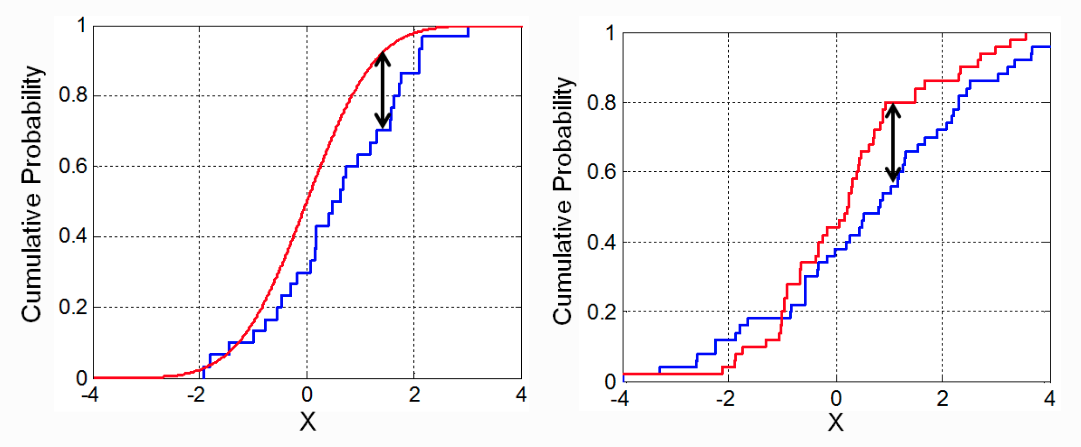

In [89]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp
import numpy as np

In [69]:
ecdf_fcbayern = ECDF(fc_bayern_df['Rating'])
ecdf_fcbarcelona = ECDF(fc_barcelona_df['Rating'])

In [95]:
min_grid = min(fc_bayern_df['Rating'].min(),fc_barcelona_df['Rating'].min())
max_grid = max(fc_bayern_df['Rating'].max(),fc_barcelona_df['Rating'].max())
grid = range(min_grid-2,max_grid+2)
acc_prob_ecdf_fcbayern = ecdf_fcbayern(grid)
acc_prob_ecdf_fcbarcelona = ecdf_fcbarcelona(grid)

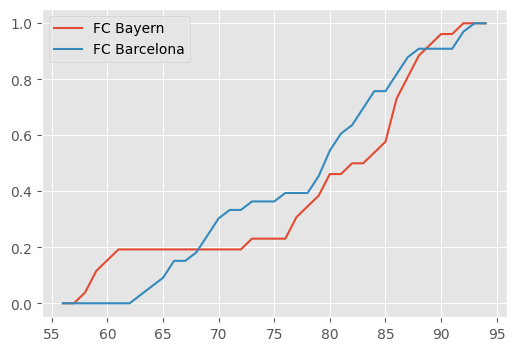

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(grid, acc_prob_ecdf_fcbayern, label='FC Bayern')
ax.plot(grid, acc_prob_ecdf_fcbarcelona, label='FC Barcelona')
ax.legend();

Let´s calculate the K-S distance.

In [81]:
abs_dif = np.abs(acc_prob_ecdf_fcbayern - acc_prob_ecdf_fcbarcelona)
distance_ks = np.max(abs_dif)
print(f"Distance Kolmogorov–Smirnov: {distance_ks :.4f}")

Distancia Kolmogorov–Smirnov: 0.2191


Let´s see if the contrast considers both teams similarly rated.

In [75]:
ks_2samp(
    fc_bayern_df['Rating'],
    fc_barcelona_df['Rating']
)

KstestResult(statistic=0.2191142191142191, pvalue=0.4095230699165908, statistic_location=84, statistic_sign=-1)

We finally reject the null hypothesis, due to the p-value is over 0.05. Both teams are not similar, if Luis Enrique wants to go to FC Bayern and fight for every competition, he should think of several signings. Can we give him any recommendation?

In [101]:
print('FC Bayern Munich: ', len(fc_bayern_df['Rating']), ' players')
print('FC Barcelona: ', len(fc_barcelona_df['Rating']), ' players')

FC Bayern Munich:  26  players
FC Barcelona:  33  players


As we can see FC Barcelona has more players contracted, then our advice could be what players should leave FC Bayern. For that, we are going to perform outliers detection, and this way find what players are under the minimum rating we demand (outliers).

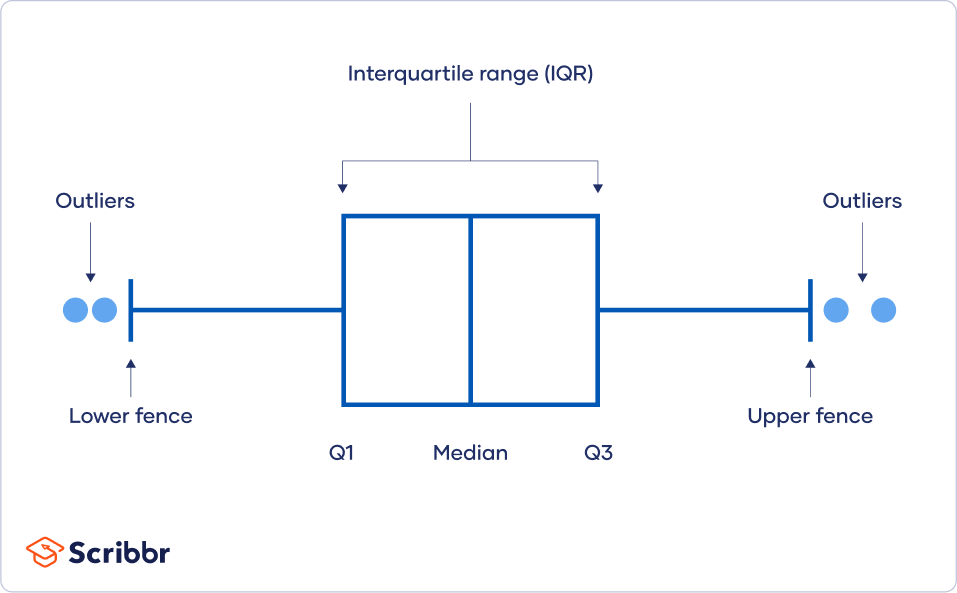

So let´s calculate the lower fence in our case, the FC Bayern players.

<Axes: xlabel='Rating'>

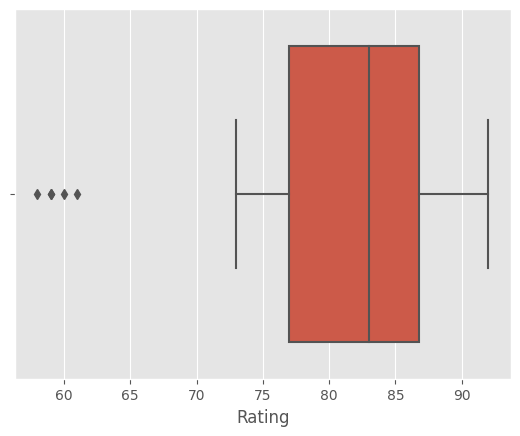

In [97]:
sns.boxplot(x=fc_bayern_df['Rating'])

In [112]:
Q1 = fc_bayern_df['Rating'].quantile(0.3)
Q3 = fc_bayern_df['Rating'].quantile(0.7)
IQR = Q3 - Q1
Lower_fence = Q1 - (1.5 * IQR)

In [113]:
fc_bayern_outs = fc_bayern.filter(fc_bayern.Rating <= Lower_fence)
fc_bayern_outs.show()

+-------------+-----------+-----------------+------------+---------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|         Name|Nationality|National_Position|National_Kit|     Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleration|Sp

This